<a href="https://colab.research.google.com/github/mateuscsco/Formacao_Data_Science/blob/main/Pandas/Identificando_e_Removendo_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Relatório de Análise VIII

##Identificando e Removendo Outliers

In [ ]:
#importando pandas e matplotlib e drive do colab
%matplotlib inline
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14,6))

Mounted at /content/drive


Estamos utilziando Box-plot, que possui a seguinte configuração: temos uma mediana, em que dividimos os dados em 50%, para a direita e esquerda, igualmente. Teremos o Q1, que se refere ao primeiro quartil e parte em 25% e 75%, já o Q3 parte os dados em 75% e 25%. A diferente entre Q3 e Q1 gera o intervalo interquartirico, isto é, as estatísticas que geraremos para realizar o corte de outliers.
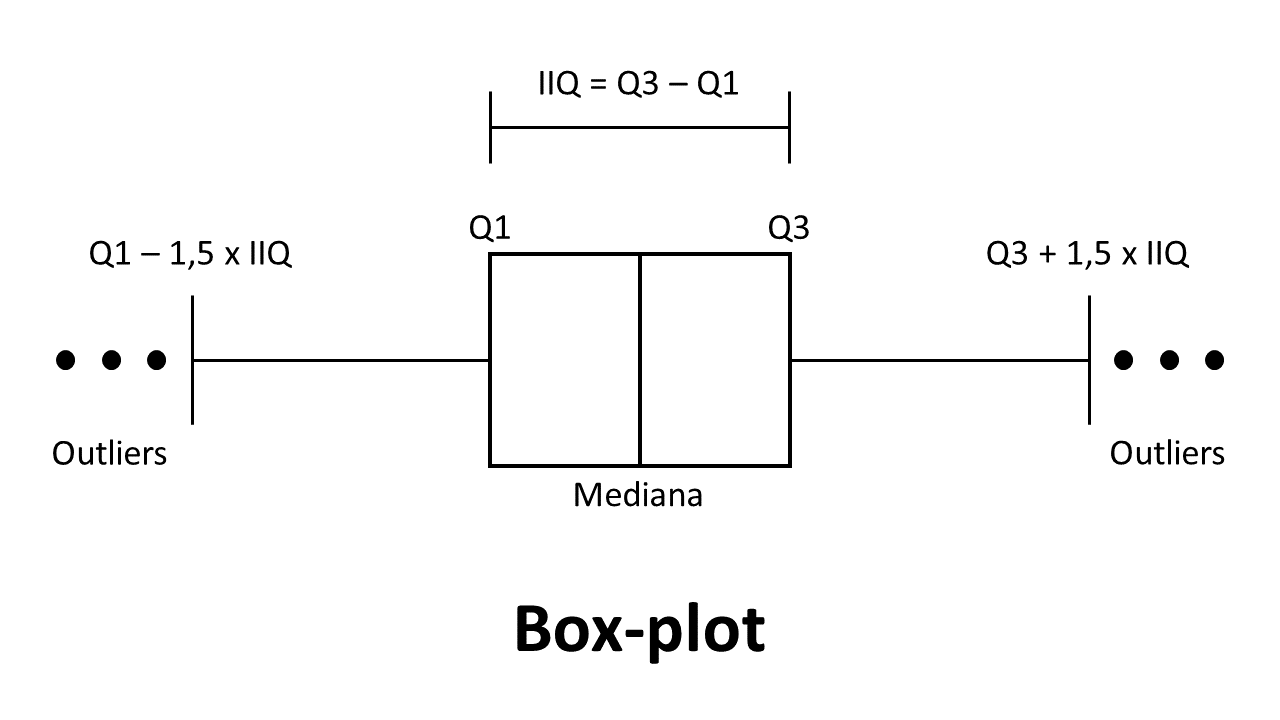

In [ ]:
dados = pd.read_csv('drive/MyDrive/Colab Notebooks/Formação Data Science/Pandas/Dados/aluguel_residencial.csv', sep=';')
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


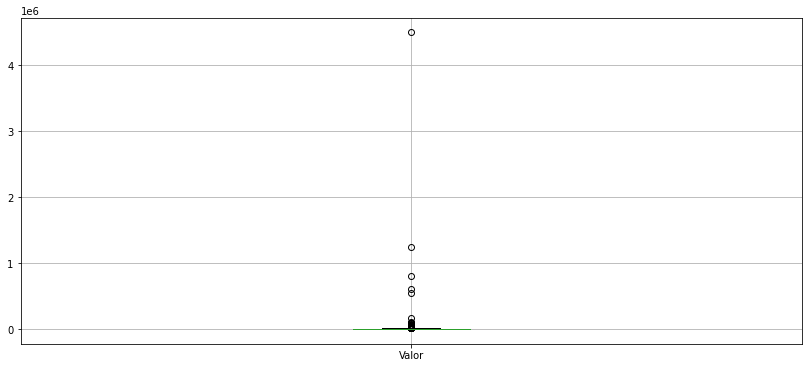

In [ ]:
dados.boxplot(['Valor']) # fazendo o boxplot, visualização ruim

In [ ]:
dados[dados['Valor'] >= 500000]#exibindo "outliers", no caso, imóveis com valores maiores ou iguais a 500000.0

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [ ]:
valor = dados['Valor']#armazenei a column numa variável, formando uma Series

In [ ]:
#Usamos a column para realizar cálculos
Q1 = valor.quantile(.25)#Primeiro, calcularemos Q1 o primeiro quartil.
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1#intevalo interquartilico
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ
print(Q1, Q3, IIQ, limite_inferior, limite_superior)

1600.0 5500.0 3900.0 -4250.0 11350.0


In [ ]:
#Faremos uma seleção dos dados que estão apenas dentro desses dois limites
selecao = (valor >=limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

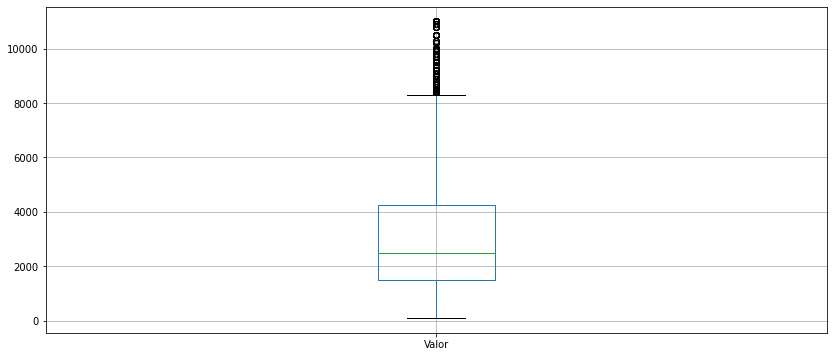

In [ ]:
dados_new.boxplot(['Valor'])# a vusualização ja ficou melhor

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7722d88d90>]],
      dtype=object)

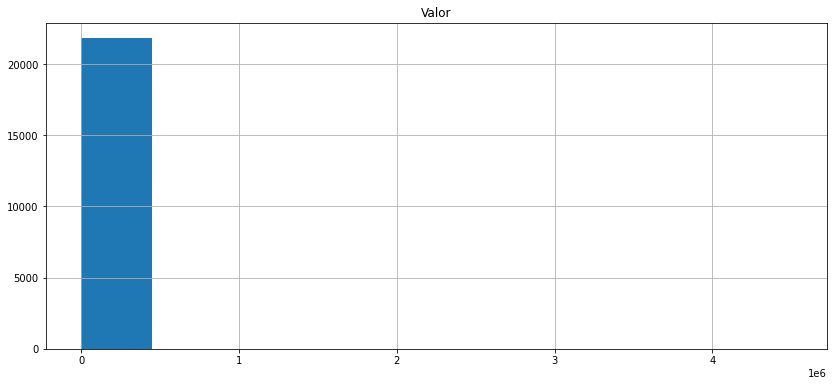

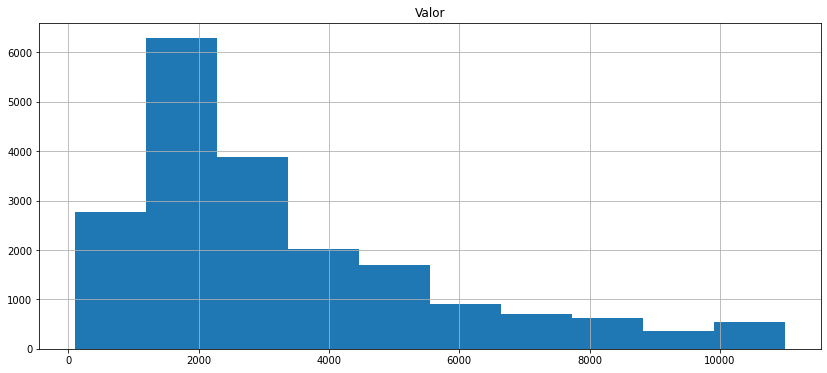

In [ ]:
#Agora, estudaremos o histograma, isto é, uma distribuição de frequências dos dados. 
dados.hist(['Valor'])# com outliers
dados_new.hist(['Valor'])#sem outliers

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


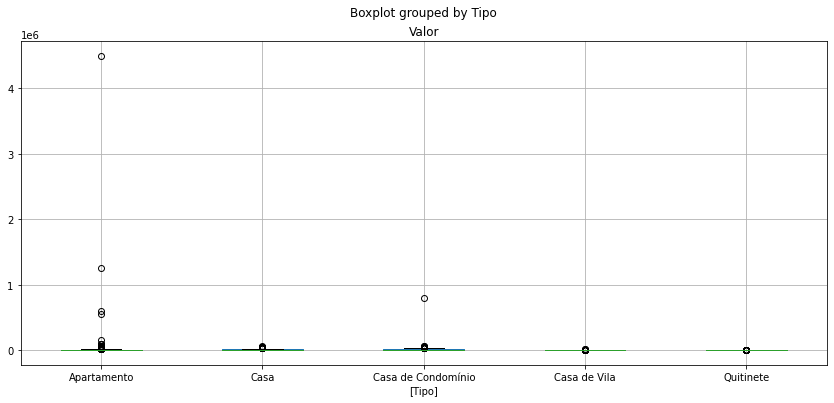

In [ ]:
#box-plot pautado por tipo de imóvel
dados.boxplot(['Valor'], by = ['Tipo'])

In [ ]:
#análise para os grupos que selecionamos
grupo_tipo = dados.groupby('Tipo')
#Criamos um grupo para todo o dataframe
type(grupo_tipo)

In [ ]:
#criar um grupo com base na variável Valor por Tipo
grupo_tipo = dados.groupby('Tipo')['Valor']
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [ ]:
grupo_tipo.groups
#mudamos nosso tipo de DataFrameGroupy para Series. 
#Podemos visualizar o conteúdo dos dados, ao escrever grupo_tipo.groups, que será um dicionário, cuja a chave será o Tipo, e os índices de localização.

{'Apartamento': [2, 3, 4, 7, 8, 9, 11, 13, 14, 15, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 79, 80, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, ...], 'Casa': [1, 22, 54, 57, 96, 100, 144, 160, 180, 238, 250, 253, 264, 286, 310, 316, 334, 339, 357, 378, 385, 399, 424, 434, 474, 475, 481, 511, 542, 543, 567, 571, 572, 618, 621, 630, 635, 636, 660, 676, 700, 721, 724, 760, 771, 780, 856, 873, 937, 982, 1029, 1036, 1118, 1123, 1125, 1157, 1178, 1249, 1256, 1316, 1335, 1350, 1371, 1412, 1426, 1430, 1440, 1445, 1472, 1475, 1488, 1586, 1604, 1656, 1662, 1666, 1671, 1684, 1709, 1717, 1762, 1810, 1835, 1875, 1905, 1933, 1942, 1960, 2019, 2039, 2056, 2075, 2101, 2107, 2108, 2133, 2170, 2201, 2204, 2211, ...], 'Casa 

In [ ]:
#podemos então, realizar os cálculos
Q1 =  grupo_tipo.quantile(.25)
Q3 =  grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ
print(Q1)#exemplo

                    Quartos  Vagas  Suites    Area   Valor  Condominio  IPTU  \
Tipo                                                                           
Apartamento             2.0    1.0     0.0   67.00  1700.0      600.00   0.0   
Casa                    2.0    0.0     0.0   70.00  1100.0        0.00   0.0   
Casa de Condomínio      3.0    2.0     1.0  205.25  4000.0      490.00   0.0   
Casa de Vila            1.0    0.0     0.0   45.00   750.0        0.00   0.0   
Quitinete               1.0    0.0     0.0   24.00   900.0      325.75   0.0   

                    Valor m2  
Tipo                          
Apartamento          21.8950  
Casa                 13.7500  
Casa de Condomínio   16.5225  
Casa de Vila         15.0000  
Quitinete            33.3300  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Ao visualizarmos Q1, por exemplo, teremos uma Series por tipo de imóvel. 
#O mesmo vale para todos os elementos da fórmula, como Q3, limite superior e inferior. 
#Como podemos acessar o limite_superior de um tipo de imóvel do tipo apartamento?
limite_superior['Apartamento']

9950.0

In [ ]:
#identificarmos os dados discrepantes de acordo com os tipos de apartamento
for tipo in grupo_tipo.groups.keys():
    print(tipo)

Apartamento
Casa
Casa de Condomínio
Casa de Vila
Quitinete


In [ ]:
#realizar uma seleção, e em um caso que temos mais de um tipo de variável, Tipo e Valor
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo#comparamos os ítens na column Tipo com a variável tipo do for
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    #verificamos se o Valor está dentro do limite
    selecao = eh_tipo & eh_dentro_limite
    # a variável selecao é a intersecção das duas condições
    dados[selecao]# lemos valores que estão no intervalo dos limites e atendem aos tipos acima

In [ ]:
dados_selecao = dados[selecao] # inserimos a relação e, uma variável

In [ ]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])#concatena a intersecção de valores

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


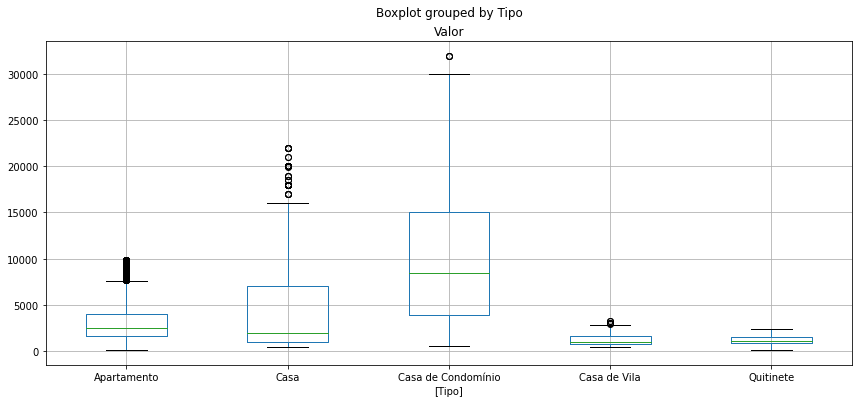

In [ ]:
dados_new.boxplot(['Valor'], by = ['Tipo'])
#plotamos novamente o boxplot do valor por tipo de imóvel, considerando valores dentro dos limites e dados calculados para identificar os quartis

In [ ]:
# salvando o arquivo
dados_new.to_csv('drive/MyDrive/Colab Notebooks/Formação Data Science/Pandas/Dados/aluguel_residencial_sem_outliers.csv', sep = ';', index = False)